<h2>What is the protactinium half-decay?</h2>

The proctatinium is a radioactive isotope that decays exponentially with time, whose available quantity at a given
instant in time follows
N(t) = N0 exp (−λt) , (1)
where N0 is the initial amount of material and λ is the decay constant. In this exercise we will focus on a non-MCMC approach for determining the proctatinium’s half-life. The theoretical value is 1.17 minutes. Do the
following:
1. Download experimental data for proctatinium decay from this <a href="https://gist.githubusercontent.com/raquelhr/d1324510056353feeccf111d6b186a0d/raw/7b3bccc7917f3baa7ec1d919195d120083ee75e9/proctatinium_data.csv">gist</a>. You may wish to read and store the data
in a pandas dataframe.
2. To find the proctatinium’s half-life, you will run 10,000 trials, and start with an initial guess λ = 1. Experimental results are known to be subject to experimental reading errors. For each fitting trial, add a gaussian
random noise to all the $N(t)$ readings, with mean 0 and standard deviation 1.
3. For each trial, fit the experimental points to the function
$N(T) = 32 \exp (−λ ∗ t)$
and find the best value of λ by using the scipy.optimize() function. Notice that this equation means
$N_0 = 32$.
4. Plot the histogram of best fit values for λ.
5. Report on the experimental estimate for the proctatinium’s half-life by using the mean best fit for λ

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


In [6]:
df = pd.read_csv("https://gist.githubusercontent.com/raquelhr/d1324510056353feeccf111d6b186a0d/raw/7b3bccc7917f3baa7ec1d919195d120083ee75e9/proctatinium_data.csv")
print(len(df))
df.head()


83


,time,count_rate
0,0,32
1,5,28
2,10,29
3,15,28
4,20,25


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


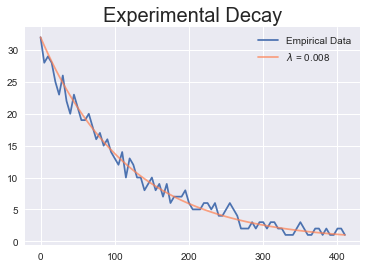

In [59]:
from scipy.optimize import curve_fit

def N(t,  lambda_): 
    return 32 * np.exp(-lambda_ * t)

popt, pcov = curve_fit(N, df['time'], df['count_rate'])

plt.plot(df.time, df.count_rate, label = 'Empirical Data')
plt.plot(df.time, N(df.time, popt), color='coral', alpha=0.7, label='$\lambda$ = %5.3f' % tuple(popt))
plt.title('Experimental Decay', fontsize = 20)
plt.legend()
plt.show()

In [64]:
result = np.zeros(10000)
for i in range(10000):
    popt, pcov = curve_fit(N, df['time'], df['count_rate']+np.random.normal(0,1))
    result[i] = popt
    

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


(array([  38.,  467., 1702., 2915., 2574., 1458.,  600.,  188.,   45.,
          13.]),
 array([0.00560844, 0.00632076, 0.00703309, 0.00774542, 0.00845775,
        0.00917008, 0.0098824 , 0.01059473, 0.01130706, 0.01201939,
        0.01273171]),
 <a list of 10 Patch objects>)

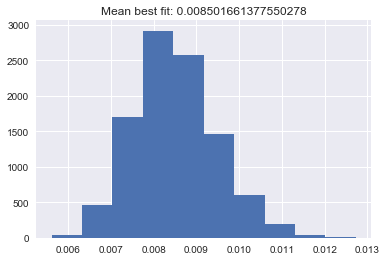

In [65]:
plt.title(f"Mean best fit: {np.mean(result)}")
plt.hist(result)